# **House prices prediction**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
house=pd.read_csv('/content/train.csv')

In [ ]:
house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# **EDA**

In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
x=house.iloc[:,:51]

In [ ]:
x

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,Y,SBrkr,856,854,0,1710,1,0,2,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,Y,SBrkr,1262,0,0,1262,0,1,2,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,Y,SBrkr,920,866,0,1786,1,0,2,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,Y,SBrkr,961,756,0,1717,1,0,1,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,Y,SBrkr,953,694,0,1647,0,0,2,1
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,Y,SBrkr,2073,0,0,2073,1,0,2,0
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,Y,FuseA,1078,0,0,1078,1,0,1,0


In [ ]:
x.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [ ]:
y=house.iloc[:,51:]

In [ ]:
y

,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
y.isna().sum()

BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

In [ ]:
house1=house.drop(['MiscFeature','Fence','PoolQC','Alley','FireplaceQu'],axis=1)

In [ ]:
house1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

**filling missing values**

---

---



---





In [ ]:
LF=house1['LotFrontage'].mean()

In [ ]:
LF

70.04995836802665

In [ ]:
house1['LotFrontage']=(house1['LotFrontage'].fillna(LF))



---



---



In [ ]:
BQ=house1['BsmtQual'].mode()

In [ ]:
BQ

0    TA
dtype: object

In [ ]:
house1['BsmtQual']=(house1['BsmtQual'].fillna("TA"))



---



---



In [ ]:
BC=house1['BsmtCond'].mode()

In [ ]:
BC

0    TA
dtype: object

In [ ]:
house1['BsmtCond']=(house1['BsmtCond'].fillna("TA"))



---



---



In [ ]:
BE=house1['BsmtExposure'].mode()

In [ ]:
BE

0    No
dtype: object

In [ ]:
house1['BsmtExposure']=(house1['BsmtExposure'].fillna("NO"))



---



---



In [ ]:
BF1=house1['BsmtFinType1'].mode()

In [ ]:
BF1

0    Unf
dtype: object

In [ ]:
house1['BsmtFinType1']=(house1['BsmtFinType1'].fillna("Unf"))



---



---



In [ ]:
BF2=house1['BsmtFinType2'].mode()

In [ ]:
BF2

0    Unf
dtype: object

In [ ]:
house1['BsmtFinType2']=(house1['BsmtFinType2'].fillna("Unf"))



---



---



In [ ]:
E=house1['Electrical'].mode()

In [ ]:
E

0    SBrkr
dtype: object

In [ ]:
house1['Electrical']=(house1['Electrical'].fillna("SBrkr"))



---



---



In [ ]:
GT=house1['GarageType'].mode()

In [ ]:
GT

0    Attchd
dtype: object

In [ ]:
house1['GarageType']=(house1['GarageType'].fillna("Attchd"))



---



---



In [ ]:
GY=house1['GarageYrBlt'].mean()

In [ ]:
GY

1978.5061638868744

In [ ]:
house1['GarageYrBlt']=(house1['GarageYrBlt'].fillna(GY))



---



---



In [ ]:
GF=house['GarageFinish'].mode()

In [ ]:
GF

0    Unf
dtype: object

In [ ]:
house1['GarageFinish']=(house1['GarageFinish'].fillna("Unf"))



---



---



In [ ]:
GQ=house1['GarageQual'].mode()

In [ ]:
GQ

0    TA
dtype: object

In [ ]:
house1['GarageQual']=(house1['GarageQual'].fillna('TA'))



---



---



In [ ]:
GC=house1['GarageCond'].mode()

In [ ]:
GC

0    TA
dtype: object

In [ ]:
house1['GarageCond']=(house1['GarageCond'].fillna('TA'))

In [ ]:
mva=house1['MasVnrArea'].mean()

In [ ]:
mva

103.68526170798899

In [ ]:
house1['MasVnrArea']=(house1['MasVnrArea'].fillna(mva))

In [ ]:
mvt=house1['MasVnrType'].mode()

In [ ]:
mvt

0    None
dtype: object

In [ ]:
house1['MasVnrType']=(house1['MasVnrType'].fillna('2'))



---



---



In [ ]:
x1=house1.iloc[:,:51]

In [ ]:
y1=house1.iloc[:,51:]

In [ ]:
x1.isna().sum()

Id              0
MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
dtype: int64

In [ ]:
y1.isna().sum()

KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

***Feature-Enginnering***

---



---



---



In [ ]:
x1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,SBrkr,856,854,0,1710,1,0,2,1,3
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,SBrkr,1262,0,0,1262,0,1,2,0,3
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,SBrkr,920,866,0,1786,1,0,2,1,3
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,SBrkr,961,756,0,1717,1,0,1,0,3
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,SBrkr,1145,1053,0,2198,1,0,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,SBrkr,953,694,0,1647,0,0,2,1,3
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,SBrkr,2073,0,0,2073,1,0,2,0,3
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,SBrkr,1188,1152,0,2340,0,0,2,0,4
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,FuseA,1078,0,0,1078,1,0,1,0,2


In [ ]:
y1

,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1,TA,7,Min1,2,Attchd,1978.0,Unf,2,500,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1,240,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [ ]:
from sklearn.preprocessing import LabelEncoder as le

In [ ]:
categorical_variable=house1.select_dtypes(include=['category', object]).columns

In [ ]:
categorical_variable

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
list=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']

In [ ]:
house1[list].value_counts

<bound method DataFrame.value_counts of      MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...      ...         ...       ...       ...       ...   
1455       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2  ... Electrical Kit

In [ ]:
house1[list]=house1[list].apply ( le().fit_transform)

In [ ]:
house1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   int64  
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   int64  
 12  Condition1     1460 non-null   int64  
 13  Condition2     1460 non-null   int64  
 14  BldgType       1460 non-null   int64  
 15  HouseStyle     1460 non-null   int64  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

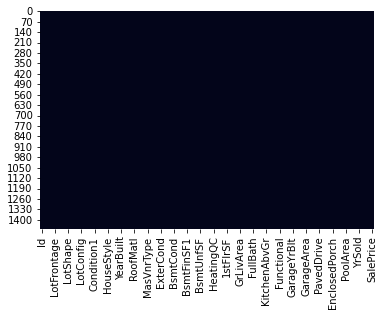

In [ ]:
sns.heatmap(house1.isnull(),cbar=False)

In [ ]:
h1=house1.corr()

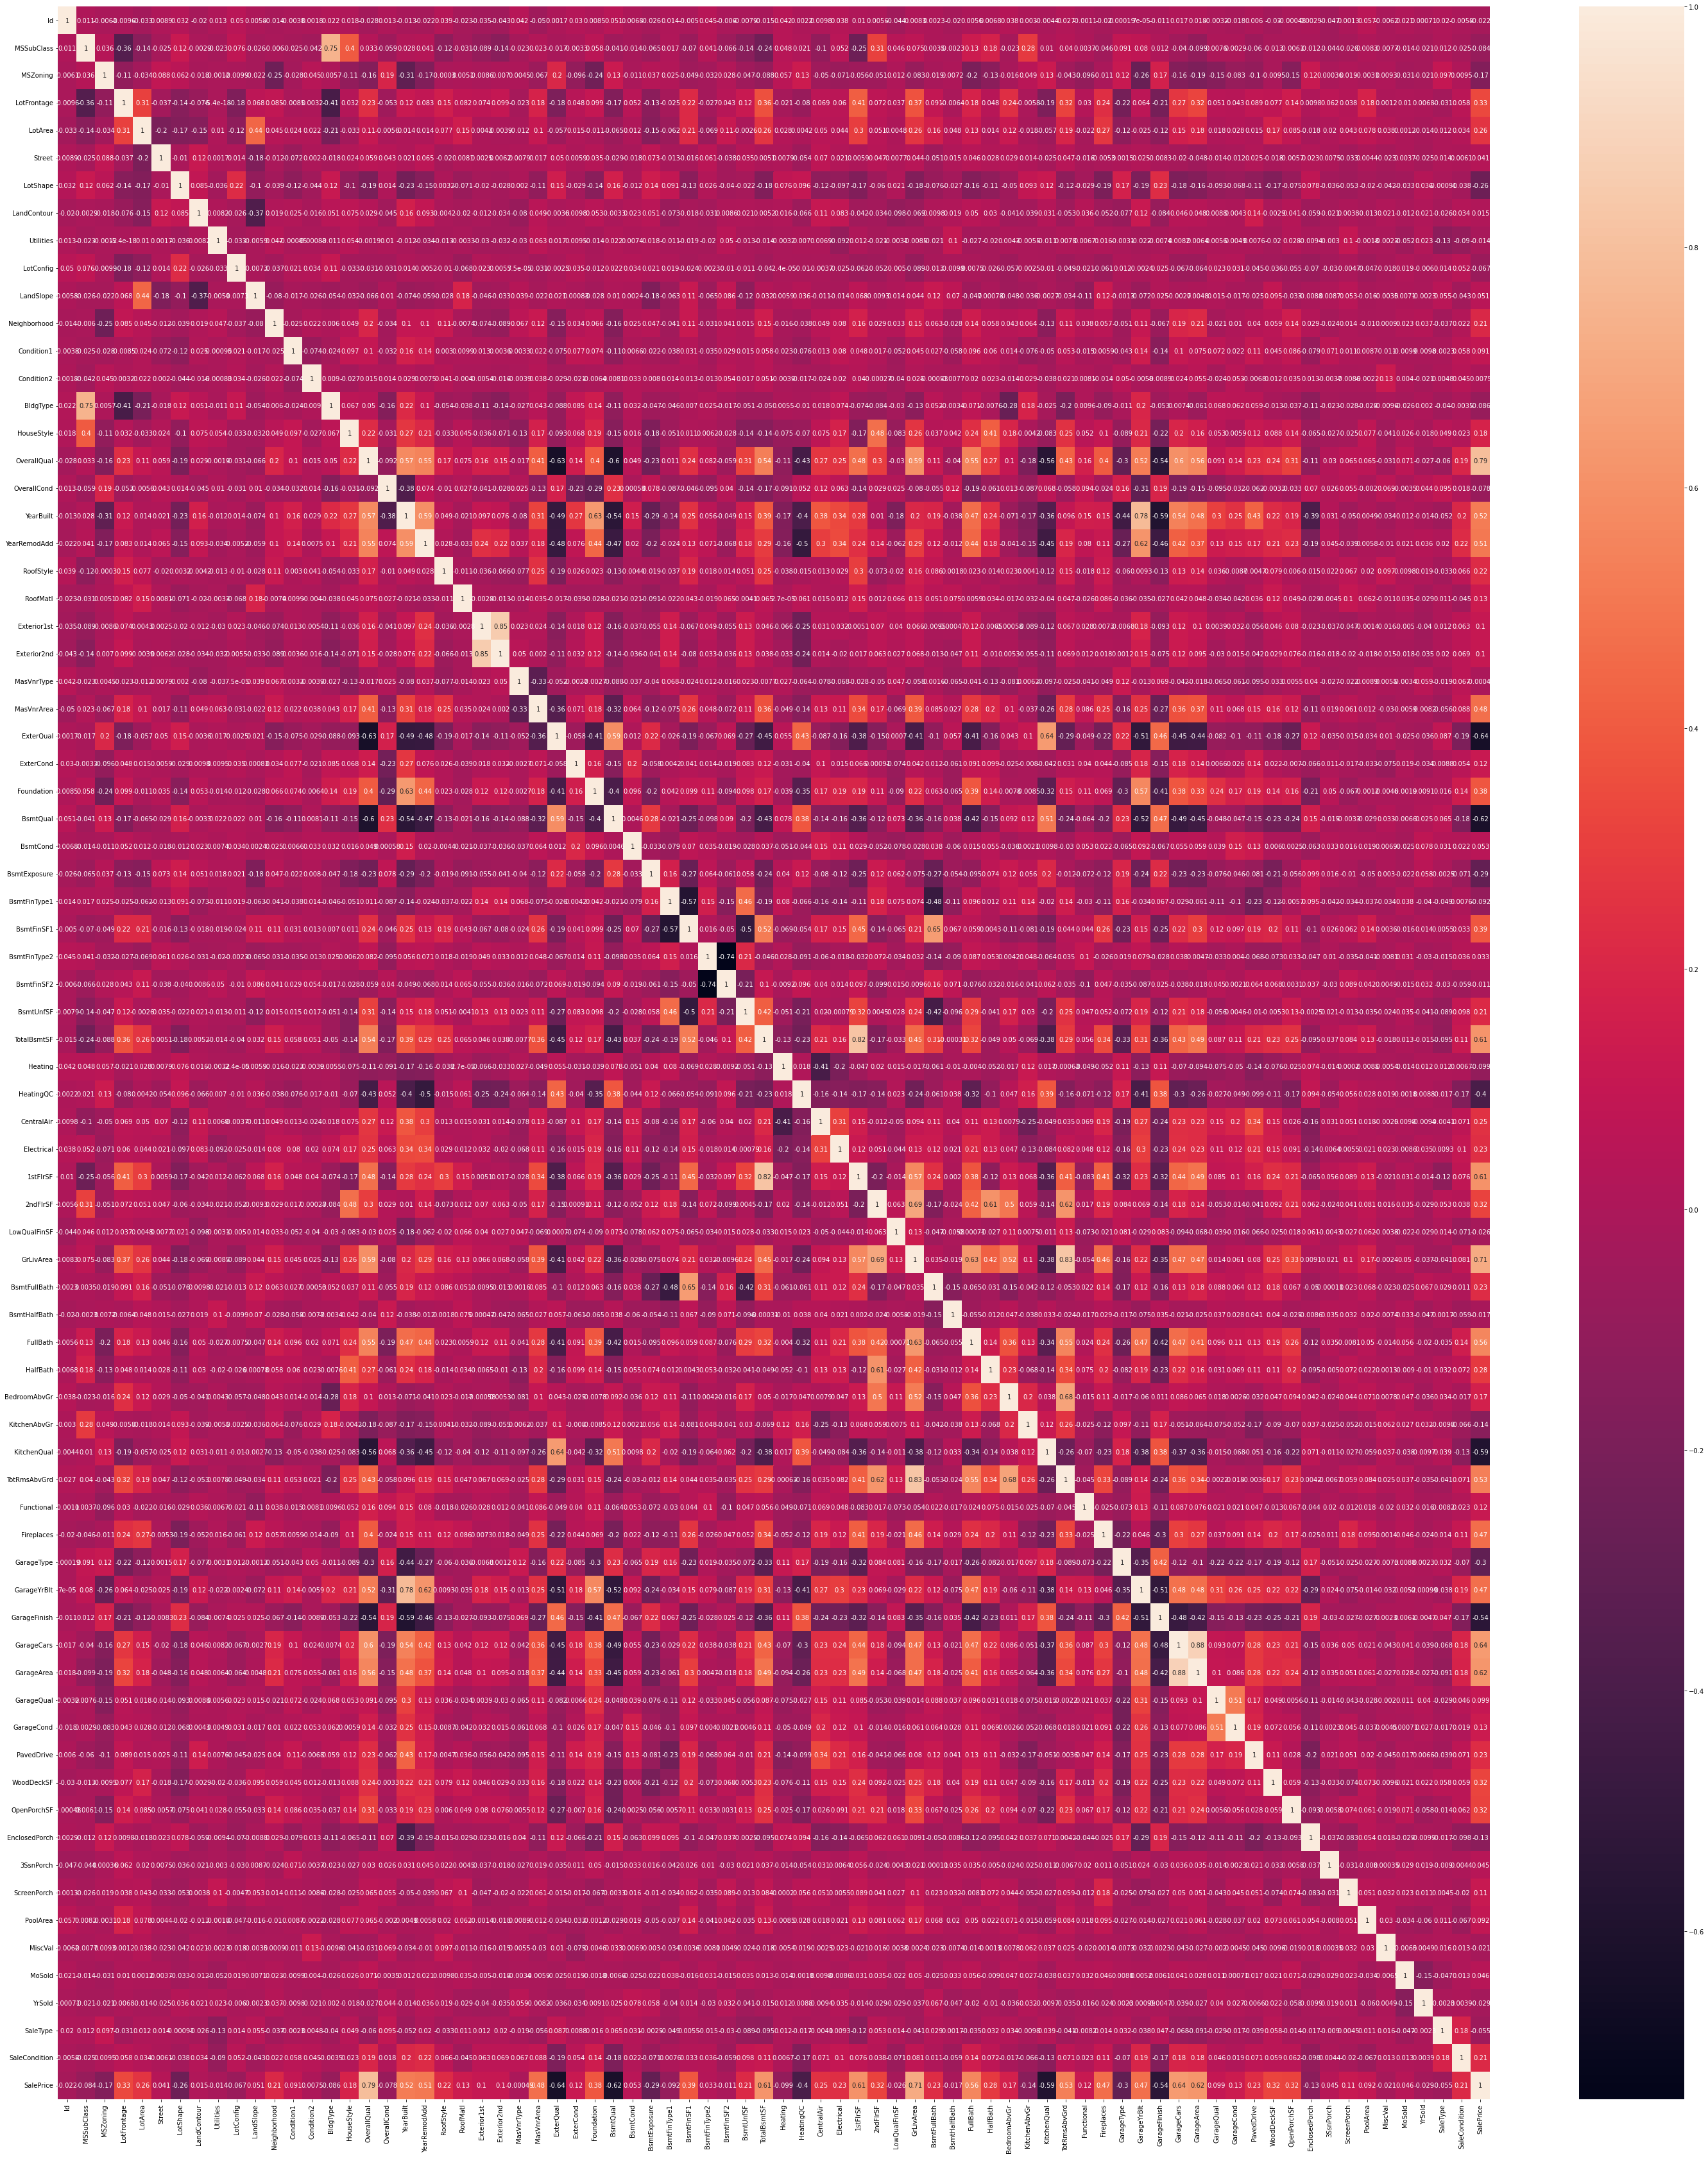

In [ ]:
fig=plt.figure(figsize=(50,60))
sns.heatmap(h1,annot=True)
#overalqual,yearbuilt,yearremodadd,masvnrarea,totalbsmtsf,1stflrsf,grlivearea,fullbath,totrmsabvgrd,fireplace,garageyrblt,garagecars,garagearea

# **test data eda**

In [ ]:
test=pd.read_csv('/content/test.csv')

In [ ]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

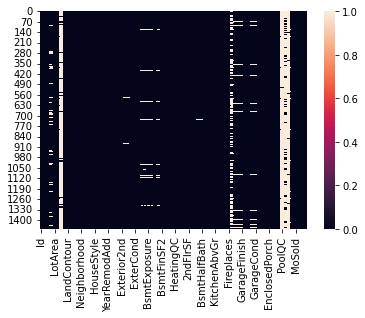

In [ ]:

sns.heatmap(test.isnull())

In [ ]:
test1=test.drop(['MiscFeature','Fence','PoolQC','Alley','FireplaceQu'],axis=1)


In [ ]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [ ]:
xt=test1.iloc[:,0:51]

In [ ]:
xt.isna().sum()

Id                0
MSSubClass        0
MSZoning          4
LotFrontage     227
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         2
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       1
Exterior2nd       1
MasVnrType       16
MasVnrArea       15
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinSF1        1
BsmtFinType2     42
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      2
BsmtHalfBath      2
FullBath          0
HalfBath          0


In [ ]:
test1['MSZoning'].mode()

0    RL
dtype: object

In [ ]:
test1['MSZoning']=test1['MSZoning'].fillna("RL")

In [ ]:
test1['Utilities'].mode()

0    AllPub
dtype: object

In [ ]:
test1['Utilities']=test1['Utilities'].fillna("AllPub")

In [ ]:
test1['Exterior2nd'].mode()

0    VinylSd
dtype: object

In [ ]:
test1['Exterior2nd']=test1['Exterior2nd'].fillna('VinylSd')

In [ ]:
test1['Exterior1st'].mode()

0    VinylSd
dtype: object

In [ ]:
test1['Exterior1st']=test1['Exterior1st'].fillna('VinylSd')

In [ ]:
test1['BsmtFinType2'].mode()

0    Unf
dtype: object

In [ ]:
test1['BsmtFinType2']=test1['BsmtFinType2'].fillna('Unf')

In [ ]:
test1['BsmtFinType1'].mode()

0    GLQ
dtype: object

In [ ]:
test1['BsmtFinType1']=test1['BsmtFinType1'].fillna('GLQ')

In [ ]:
test1['MasVnrType'].mode()

0    None
dtype: object

In [ ]:
test1['MasVnrType']=test1['MasVnrType'].fillna('None')

In [ ]:
test1['BsmtQual'].mode()

0    TA
dtype: object

In [ ]:
test1['BsmtQual']=test1['BsmtQual'].fillna('TA')

In [ ]:
test1['BsmtCond'].mode()

0    TA
dtype: object

In [ ]:
test1['BsmtCond']=test1['BsmtCond'].fillna('TA')

In [ ]:
test1['BsmtExposure'].mode()

0    No
dtype: object

In [ ]:
test1['BsmtExposure']=test1['BsmtExposure'].fillna('No')

In [ ]:
test1['LotFrontage']=test1['LotFrontage'].fillna(test1['LotFrontage'].mean())
test1['MasVnrArea']=test1['MasVnrArea'].fillna(test1['MasVnrArea'].mean())
test1['BsmtFullBath']=test1['BsmtFullBath'].fillna(test1['BsmtFullBath'].mean())
test1['BsmtHalfBath']=test1['BsmtHalfBath'].fillna(test1['BsmtHalfBath'].mean())
test1['TotalBsmtSF']=test1['TotalBsmtSF'].fillna(test1['TotalBsmtSF'].mean())
test1['BsmtUnfSF']=test1['BsmtUnfSF'].fillna(test1['BsmtUnfSF'].mean())
test1['BsmtFinSF2']=test1['BsmtFinSF2'].fillna(test1['BsmtFinSF2'].mean())
test1['BsmtFinSF1']=test1['BsmtFinSF1'].fillna(test1['BsmtFinSF1'].mean())



In [ ]:
xt2=test1.iloc[:,0:51]

In [ ]:
xt2.isna().sum()

Id              0
MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
dtype: int64

In [ ]:
yt=test1.iloc[:,50:]

In [ ]:
yt.isna().sum()

BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       1
TotRmsAbvGrd      0
Functional        2
Fireplaces        0
GarageType       76
GarageYrBlt      78
GarageFinish     78
GarageCars        1
GarageArea        1
GarageQual       78
GarageCond       78
PavedDrive        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
SaleType          1
SaleCondition     0
dtype: int64

In [ ]:
test1['GarageArea']=test1['GarageArea'].fillna(test1['GarageArea'].mean())
test1['GarageCars']=test1['GarageCars'].fillna(test1['GarageCars'].mean())
test1['GarageYrBlt']=test1['GarageYrBlt'].fillna(test1['GarageYrBlt'].mean())

In [ ]:
test1['KitchenQual'].mode()

0    TA
dtype: object

In [ ]:
test1['KitchenQual']=test1['KitchenQual'].fillna('TA')

In [ ]:
test1['Functional'].mode()

0    Typ
dtype: object

In [ ]:
test1['Functional']=test1['Functional'].fillna('Typ')

In [ ]:
test1['GarageCond'].mode()

0    TA
dtype: object

In [ ]:
test1['GarageCond']=test1['GarageCond'].fillna('TA')

In [ ]:
test1['GarageQual'].mode()

0    TA
dtype: object

In [ ]:
test1['GarageQual']=test1['GarageQual'].fillna('TA')

In [ ]:
test1['SaleType'].mode()

0    WD
dtype: object

In [ ]:
test1['SaleType']=test1['SaleType'].fillna('WD')

In [ ]:
test1['GarageType'].mode()

0    Attchd
dtype: object

In [ ]:
test1['GarageType']=test1['GarageType'].fillna('Attchd')

In [ ]:
test1['GarageFinish'].mode()

0    Unf
dtype: object

In [ ]:
test1['GarageFinish']=test1['GarageFinish'].fillna('Unf')

In [ ]:
yt2=test1.iloc[:,50:]

In [ ]:
yt2.isna().sum()

BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
dtype: int64

In [ ]:
variable=test1.select_dtypes(include=['category',object]).columns

In [ ]:
variable

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
pack=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']

In [ ]:
test1[pack]=test1[pack].apply(le().fit_transform)

In [ ]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int64  
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int64  
 6   LotShape       1459 non-null   int64  
 7   LandContour    1459 non-null   int64  
 8   Utilities      1459 non-null   int64  
 9   LotConfig      1459 non-null   int64  
 10  LandSlope      1459 non-null   int64  
 11  Neighborhood   1459 non-null   int64  
 12  Condition1     1459 non-null   int64  
 13  Condition2     1459 non-null   int64  
 14  BldgType       1459 non-null   int64  
 15  HouseStyle     1459 non-null   int64  
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

# ***prediction model***

In [ ]:
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
x_train=house1.drop(['SalePrice'],axis=1)
y_train=house1['SalePrice']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.40,random_state=78)

In [ ]:
print("Training Shape = ",x_train.shape)

Training Shape =  (876, 75)


In [ ]:
print("Testing Shape = ",x_test.shape)

Testing Shape =  (584, 75)


In [ ]:
LR=LinearRegression()

In [ ]:
LR.fit(x_train,y_train)

LinearRegression()

In [ ]:
LR.score(x_train,y_train)

0.8369860742684709

In [ ]:
LR.score(x_test,y_test)

0.8255096483279626

In [ ]:
y_pred=LR.predict(test1)

In [ ]:
y_pred

array([111013.06870166, 167451.95026966, 164308.52624797, ...,
       133817.77398238,  84922.08573892, 245942.28524194])

In [ ]:
pridictlr=pd.DataFrame(y_pred)

In [ ]:
result=pd.concat([test['Id'],pridictlr],axis=1)

In [ ]:
result.columns=['ID','SalePrice']

In [ ]:
result.to_csv('linearR4.csv',index=False)

In [ ]:
param={'alpha':np.logspace(-0.3,0.3,100)}
ridge=Ridge(normalize=True)
ridge_model=GridSearchCV(ridge,param,cv=10)
ridge_model.fit(x_train,y_train)


Streaming output truncated to the last 5000 lines.
Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the d

GridSearchCV(cv=10, estimator=Ridge(normalize=True),
             param_grid={'alpha': array([0.50118723, 0.50823036, 0.51537247, 0.52261494, 0.52995919,
       0.53740664, 0.54495876, 0.552617  , 0.56038287, 0.56825786,
       0.57624353, 0.58434141, 0.5925531 , 0.60088018, 0.60932428,
       0.61788705, 0.62657014, 0.63537526, 0.64430412, 0.65335845,
       0.66254003, 0.67185063, 0.68129207, 0.69086619, 0.70057485,...
       1.24147905, 1.25892541, 1.27661695, 1.2945571 , 1.31274937,
       1.33119729, 1.34990445, 1.36887451, 1.38811115, 1.40761812,
       1.42739922, 1.4474583 , 1.46779927, 1.48842609, 1.50934277,
       1.53055339, 1.55206209, 1.57387304, 1.5959905 , 1.61841878,
       1.64116224, 1.6642253 , 1.68761248, 1.7113283 , 1.73537741,
       1.75976447, 1.78449424, 1.80957154, 1.83500125, 1.86078831,
       1.88693776, 1.91345469, 1.94034425, 1.96761169, 1.99526231])})

In [ ]:
print(ridge_model.best_params_)
print(ridge_model.best_score_)

{'alpha': 0.8637014254641436}
0.7733652027070214


In [ ]:
rd=Ridge(alpha=0.2,normalize=True)
rd.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Ridge(alpha=0.2, normalize=True)

In [ ]:
rd.score(x_test,y_test)

0.8320435714240841

In [ ]:
rd.score(x_train,y_train)

0.8313365857276663

In [ ]:
rd_pred=rd.predict(test1)


In [ ]:
predictrd=pd.DataFrame(rd_pred)

In [ ]:
result2=pd.concat([test['Id'],predictrd],axis=1)

In [ ]:
result.columns=['id','saleprice']

In [ ]:
result.to_csv('rd5.csv',index=False)

In [ ]:
rf=RandomForestRegressor()

In [ ]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
rf_pred=rf.predict(test1)

In [ ]:
randomforest=pd.DataFrame(rf_pred)

In [ ]:
rdata=pd.concat([test['Id'],randomforest],axis=1)

In [ ]:
rdata.columns=['Id','SalePrice']

In [ ]:
rdata.to_csv('rhouse1_submission.csv',index=False)

In [ ]:
#dataset=pd.concat([test['Id'],pred],axis=1)

In [ ]:
#dataset.columns=['Id','SalePrice']
#dataset.to_csv('sample111_submission.csv',index=False)